In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = load_iris()
X = iris.data[:100]
y = iris.target[:100].reshape(-1,1)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [4]:
np.random.seed(42)
weights = np.random.rand(X_scaled.shape[1],2)
bias = np.random.rand(1,2)

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


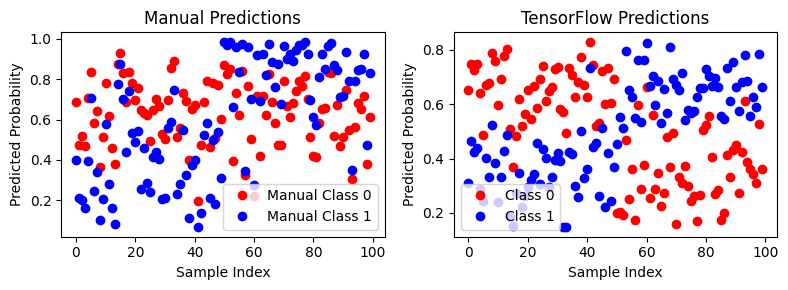

In [8]:
manual_preds = sigmoid(np.dot(X_scaled, weights) + bias)

model = Sequential([
    Dense(2, input_shape=(4,), activation='sigmoid')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_scaled, y_encoded, epochs=100, verbose=0)

tf_preds = model.predict(X_scaled)

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.plot(manual_preds[:, 0], 'ro', label='Manual Class 0')
plt.plot(manual_preds[:, 1], 'bo', label='Manual Class 1')
plt.title("Manual Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tf_preds[:, 0], 'ro', label='Class 0')
plt.plot(tf_preds[:, 1], 'bo', label='Class 1')
plt.title("TensorFlow Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability")
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
manual_df = pd.DataFrame(manual_preds, columns=['Manual Class 0', 'Manual Class 1'])
tf_df = pd.DataFrame(tf_preds, columns=['TF Class 0', 'TF Class 1'])
comparison_df = pd.concat([manual_df, tf_df], axis=1)
print(comparison_df.head())

   Manual Class 0  Manual Class 1  TF Class 0  TF Class 1
0        0.685923        0.401059    0.653668    0.310020
1        0.473887        0.209614    0.746445    0.462890
2        0.518655        0.200285    0.727585    0.424873
3        0.471022        0.162810    0.749161    0.440309
4        0.706021        0.395494    0.642859    0.289579
